In [1]:
import matplotlib.pyplot as plt


def show_image(image, title="Image", cmap_type="gray", sz=(10, 10)):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Decision Trees
- Classication-tree
- Sequence of if-else questions about individual features
- Objective: infer class labels
- Able to capture non-linear relationships between features and labels.
- Don't require feature scaling (ex: Standardization)

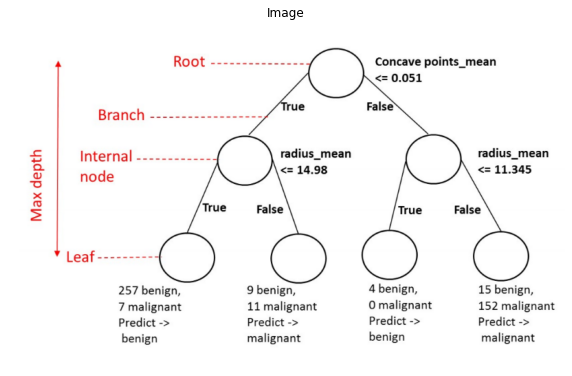

In [2]:
image = plt.imread("images/decision_treeDiagram.png")
show_image(image)

## RandomizedSearchCV over GridSearchCV using Decision Trees
- GridSearchCV can be computationally expensive, especially if we are searching over a large hyperparameter space and dealing with multiple hyperparameters. 
- A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.
- Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that we can use in exactly the same way as before.
- Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.

## PIMA Indians dataset
- Here, we will work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. 
- The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies.
- Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

In [3]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from IPython.display import display, Markdown

plt.style.use("ggplot")
sns.set()

In [4]:
diabetes = pd.read_csv("./datasets/diabetes.csv")
display(diabetes.head())
X = diabetes.drop("Outcome", axis=1).values
y = diabetes["Outcome"].values
print(X.shape)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 8)


In [5]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 9),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"],
}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
# Note that RandomizedSearchCV will never outperform GridSearchCV.
# Instead, it is valuable because it saves on computation time.

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 1}
Best score is 0.7370257193786605


In [6]:
#  Wisconsin Breast Cancer Dataset from the UCI machine learning repository
# We'll predict whether a tumor is malignant or benign based on two features:
# the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean)
# class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor
df = pd.read_csv(r"datasets/wbc.csv")
X = df[["radius_mean", "concave points_mean"]].values
y = df["diagnosis"].values == "M"
y = [int(i) for i in y]

In [7]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2)

In [8]:
# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)

0.956140350877193

### Decision Tree have rectangular decision boundary because it takes one feature at a time for classification

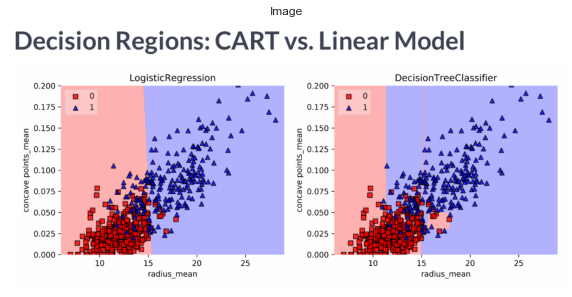

In [9]:
image = plt.imread("images/logisticRegressionVsDecisionTree.png")
show_image(image, sz=(15, 12))

# Information Gain

- *For a particular node Information Gain for all available features and split point is calculated and one that is maximum is taken.*
- *When information gain is zero or max-depth is reched node is declared as leaf depending on whichever comes first.*
- **Information gain of node is weighted average of the impurity of left and right node.**

- $$IG\left(feature,split\right) = I\left(parent\right) - \left(\frac{N_{LEFT}}{N}I\left(left\right)+\frac{N_{RIGHT}}{N}I\left(right\right)\right) $$

- $$I\left(node\right) = MSE\left(node\right) = \frac{1}{N_{node}}\sum_{i\ \in\ node}\left(y^{\left(i\right)} - \hat{y}_{node}\right)^2 $$

- $$\hat{y}_{node} = \frac{1}{N_{node}}\sum_{i\ \in\ node}y^{\left(i\right)}$$

In [10]:
from sklearn.metrics import accuracy_score


dt_entropy = DecisionTreeClassifier(max_depth=8, criterion="entropy")
dt_entropy.fit(X_train, y_train)

dt_gini = DecisionTreeClassifier(max_depth=8, criterion="gini")
dt_gini.fit(X_train, y_train)

y_pred = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred)

y_pred = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print("Accuracy achieved by using entropy: ", accuracy_entropy)

# Print accuracy_gini
print("Accuracy achieved by using the gini index: ", accuracy_gini)

Accuracy achieved by using entropy:  0.9473684210526315
Accuracy achieved by using the gini index:  0.9210526315789473


# Decision Tree for regression

In [27]:
df = pd.read_csv("datasets/auto_mpg.csv")
df = df.drop("origin", axis=1)
display(df.head())
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

,mpg,displ,hp,weight,accel,size
0,18.0,250.0,88,3139,14.5,15.0
1,9.0,304.0,193,4732,18.5,20.0
2,36.1,91.0,60,1800,16.4,10.0
3,18.5,250.0,98,3525,19.0,15.0
4,34.3,97.0,78,2188,15.8,10.0


In [29]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [36]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** 0.5

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.07


In [37]:
# Predict test set labels
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** 0.5

# Print rmse_lr
print("Linear Regression test set RMSE: {:.2f}".format(rmse_lr))

# Print rmse_dt
print("Regression Tree test set RMSE: {:.2f}".format(rmse_dt))

Linear Regression test set RMSE: 4.36
Regression Tree test set RMSE: 4.07
